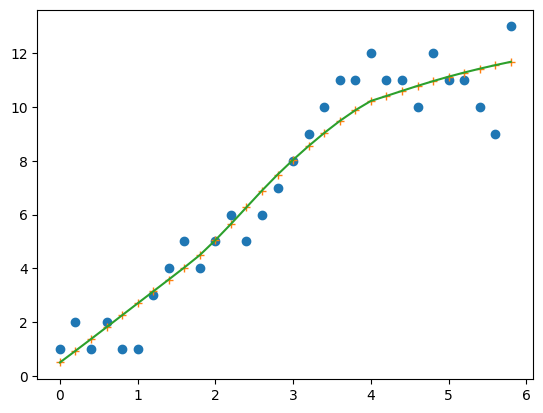

In [1]:
# on random data

import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import statsmodels.api as sm
x=[i/5.0 for i in range(30)]
y=[1,2,1,2,1,1,3,4,5,4,5,6,5,6,7,8,9,10,11,11,12,11,11,10,12,11,11,10,9,13]

lowess=sm.nonparametric.lowess(y,x)
lowess_x=list(zip(*lowess))[0]
lowess_y=list(zip(*lowess))[1]
f=interp1d(lowess_x,lowess_y,bounds_error=False)

xnew=[i/10.0 for i in range(100)]
ynew=f(xnew)
plt.plot(x,y,'o')
plt.plot(lowess_x,lowess_y,'+')
plt.plot(xnew,ynew,'-')
plt.show()

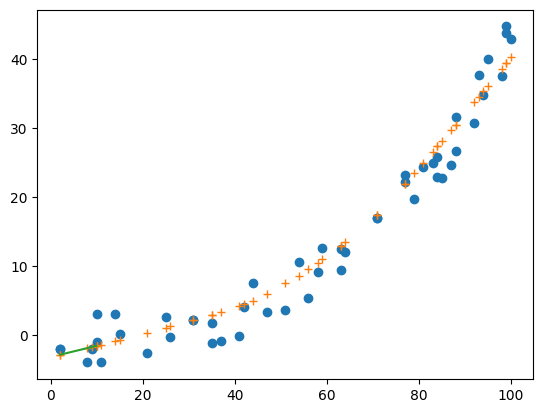

In [2]:
# on dataset same 

import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import statsmodels.api as sm
import pandas as pd

data = pd.read_csv("curve.csv")
x = data.x.values
y = data.y.values

lowess=sm.nonparametric.lowess(y,x)
lowess_x=list(zip(*lowess))[0]
lowess_y=list(zip(*lowess))[1]
f=interp1d(lowess_x,lowess_y,bounds_error=False)

xnew=[i/10.0 for i in range(100)]
ynew=f(xnew)
plt.plot(x,y,'o')
plt.plot(lowess_x,lowess_y,'+')
plt.plot(xnew,ynew,'-')
plt.show()

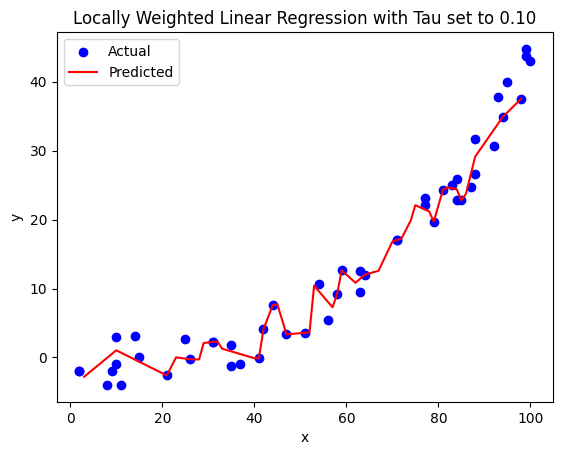

In [7]:
import numpy as np
def get_penalty_weights(query_x, X, tau):
    # Sets number of training instances
    m = X.shape[0]
    
    # Initialising weight matrix with identity matrix
    W = np.mat(np.eye(m))
    
    # calculating weights for query points
    for i in range(m):
        x = X[i]
        W[i, i] = np.exp(
            np.dot((x - query_x), (x - query_x).T) / (-2 * tau * tau)
        )
    
    return W

def predict(X, y, query_x, tau):
    # Sets number of training instances
    m = X.shape[0]
    
    # Transforms training data into matrix with one additional column of 1s
    X_transformed = np.hstack((np.reshape(X, (-1, 1)), np.ones((m, 1))))
    
    # Transforms query instance into a single row matrix with one additional column of 1
    query_x_transformed = np.mat([query_x, 1])
    
    # Gets weights
    penalty_weights = get_penalty_weights(query_x_transformed, X_transformed, tau)
    
    # Transforms target into 2-D array
    y_transformed = np.reshape(y, (-1, 1))
    
    # calculating parameter theta
    theta = np.linalg.pinv(
        X_transformed.T * (penalty_weights * X_transformed)) * (X_transformed.T * (penalty_weights * y_transformed))
    
    # calculating prediction
    prediction = np.dot(query_x_transformed, theta)
    
    return theta, prediction

data = pd.read_csv("curve.csv")
X = data.x.values
y = data.y.values

# Vsualizes the predictions the against test data

tau = 0.1

# Generates random test data with the same shape as that of train data.
X_test = np.sort(np.random.randint(1, 100, size=X.shape[0]))

# Initializes a list to hold all predictions
predictions = []

# Iterates test data and performs predictions against query instance
for query_instance in X_test:
    theta, prediction = predict(X, y, query_instance, tau)
    predictions.append(prediction.A[0][0])

# Plots the predictions over query instances

plt.scatter(X, y, color = 'blue', alpha=1.0, label="Actual")
plt.plot(X_test, predictions, color='red', label="Predicted")
# Predictions could also be visualize over scatter plot with the following
# plt.scatter(X_test, predictions, color = 'red', alpha=0.3, label = "Predicted")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Locally Weighted Linear Regression with Tau set to {:.2f}".format(tau))
plt.legend()
plt.show()

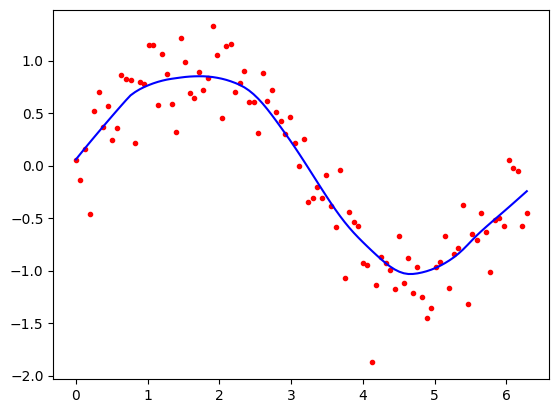

In [4]:
# Random data abhi

from math import ceil
import numpy as np
from scipy import linalg

def lowess(x, y, f, iterations):
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iterations):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],[np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest

import math
n = 100
x = np.linspace(0, 2 * math.pi, n)
y = np.sin(x) + 0.3 * np.random.randn(n)
f =0.25
iterations=3
yest = lowess(x, y, f, iterations)
    
import matplotlib.pyplot as plt
plt.plot(x,y,"r.")
plt.plot(x,yest,"b-")

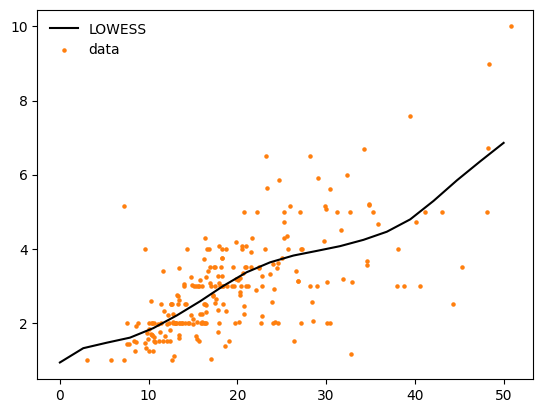

In [5]:
# dataset abhi

import numpy as np,pandas as pd
import matplotlib.pyplot as plt
from moepy import lowess

# Data generation
data = pd.read_csv('10-dataset.csv')
x = np.array(data.total_bill)
y = np.array(data.tip)

# Model fitting
lowess_model = lowess.Lowess()
lowess_model.fit(x, y)

# Model prediction
x_pred = np.linspace(0, 50, 20)
y_pred = lowess_model.predict(x_pred)

# Plotting
plt.plot(x_pred, y_pred, '-', label='LOWESS', color='k', zorder=3)
plt.scatter(x, y, label='data', color='C1', s=5, zorder=1)
plt.legend(frameon=False)


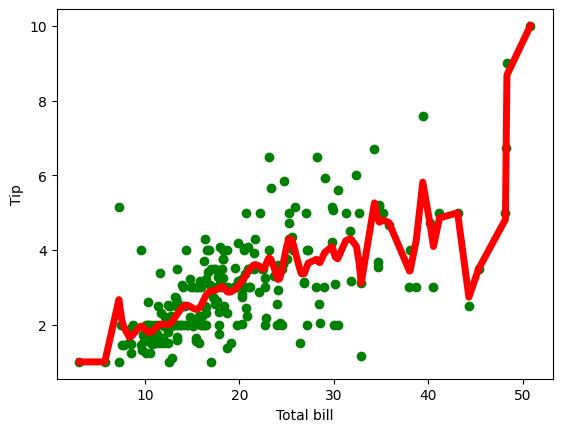

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point, xmat, ymat, k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W
     
def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
       
# load data points
data = pd.read_csv('10-dataset.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)
 
#preparing and add 1 in bill
mbill = np.mat(bill)
mtip = np.mat(tip)

m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T))

#set k here
ypred = localWeightRegression(X,mtip,0.5)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='green')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()